<a href="https://colab.research.google.com/github/hduongck/AI-ML-Learning/blob/master/Machine_Learning_Lesson_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Import Library and getting Data

%reload_ext autoreload
%autoreload 2
%matplotlib inline

!pip install fastai==0.7.0;
!pip install torchtext==0.2.3;

!pip install kaggle;
!mkdir .kaggle;

import os
import json 
token = {"username":"hduongck","key":"983e2ab1fbb29cf2734bcbf8811d42fb"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

os.makedirs('/data/bulldozers/', exist_ok=True);
os.makedirs('/.kaggle/',exist_ok=True) ;
!chmod 600 /content/.kaggle/kaggle.json;

!kaggle config set -n path -v{/content/data};



!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json;
!kaggle competitions download -c bluebook-for-bulldozers -p /content/data/bulldozers;


!unzip /content/data/bulldozers/\Train.zip -d data/bulldozers;

#Review: Position of random forests in general [0:17](https://youtu.be/O5F9vR2CNYI?t=17s)

We spent about half of this course doing **random forest** and then after today, the second half of this course will be **neural network** broadly defined. This is because these two represent the two key classes of techniques which cover nearly everything that you are likely need to do. 
- Random forest belongs to the class of techniques of decision tree ensembles along with gradient boosing machines being the other key type and some variants like extremely randomized trees. They have the benefit that they are highly interpretable, scalable, flexible, work well for most kinds of data. They have the downside that they don't extrapolate at all to data that's outside the range that you've seen as we looked at at the end of last week's session. But they are great starting point. I think there is a huge catalogue of machine learning tools out there and a lot of courses and books don't attempt to curate that down and say of these kind of problems , use this, for those kinds problems, use that, finished. But they are rather like here is a description of 100 different algorithmss and you just don't need them. I don't see why you would ever use a support vector machine today, for instance. No reason at all I could think of doing that. People loved studying them in 90s because they are very theoretically elegant and you can really write alot of math about support vector machines and people did. But in practice, I don't see them as having any place.
    
    There's a lot of techniques that you could include in an exhaustive list of every way that people adopt machine learning problems, but I would rather tell you how to actually solve machine learing problems in practice. We are about to finish today the first class which is one type of decision tree ensemple, in part two, Yanett will tell you about the other type being gradient boosting and we are about to launch next lesson into neural networks which include all kinds of generalized linear model (GLM), ridge regression, elastic net lasso, logistic regression etc are all variants of neural networks.
    
    Interestingly, Leo Breiman who created random forests did so very late in his life and unfortunately passed away not many years later. So partly because of that, very little has been written about them in the academic literature, partly because SVM were just taken over at that point that other people didn't look at them. Also because they are quite hard to grasp at a theoretical level ( analyzing them theoretically), it's quite hard to write conference papers about them or academic papers about them. But there's have a new wave in recent years of empirical machine learining like what actually work. Kaggle has been a part of that but also like companies using machine learning to make loads of money like Amazon and Google. So nowadays alot of people are writing about decision tree ensemble and creating better software for decision tree ensembles like GBM and xgboost, and ranger for R, and scikit-learn, and so forth. But a lot of this is being done in industry rather than academia but it's encouraging to see. There's certainly more work being done in deep learning than in decision tree ensembles particularly but there is alot of progess being made in both. If you look at off the packages being used today for decision tree ensembles, all the best ones the top 5 or 6, I don't know that any of them really existed 5 years ago, maybe other than sklearn, or even 3 years ago. So that's been good. But I think there's a lot of work still to be done. We talked about, for example, figuring out what interactions are the most important last week. Some of you pointed out in the forum that actually there is such a project already for a GBMs which is great but it doesn't seem that there's anything like that yet for random forests. Random forests do have a nice benefit over GBMs that they are harder to screw up and easier to scale. So hopefully that's something that is community might help fix. 
    
**Size of your validation set** [05:42](https://youtu.be/O5F9vR2CNYI?t=5m42s)

Another question I had during the week was about the size of your validation set. How big should it be? So to answer this question about big does your validation set need to be, **you first need to answer the question how precisely do I need to know the accuracy of this algorithm**. If the validation set that you have is saying this is 70% accurate and if somebody said well, is it 75% or 65% or 70% and the answer was " I don't know, anything in that range is close enough" what would be one answer. Where else, if it's like is that 70% or 70.01% or 69.99%? Then that's something else again. So you need to start out by saying how accurate do I need this. 

For example, in the deep learning course, we've been looking at dogs vs cats images and the models that we are looking at had about 99.4% , 99.55% accuracy on the validation set. And a validation set size was 2000. In fact, let's do this in Excel, that 'll be a bit easier.'. So the number of incorrect is something around ( 1- accuracy) * n

![alt text](https://cdn-images-1.medium.com/max/600/1*YMZ2fte7SMESuyVfU76gMg.png)

So we were getting about 12 wrong. And the number of cats we had is a half so the number of wrong cats is about 6. Then we run a new model and we find instead that accuracy has gone to 99.2%. Then it's like okay, is this less good at finding cats? That's like wel, it got 2 more cats wrong, so it's probaly not. Does this matter? Does 99.4 vs 99.2 matter? If it wasn't about cats and dogs but it was about finding fraud, then the difference between a 0.6% error rate and 0.8% error rate is like 25% of your cost of fraud so that can be huge.

It's really interesting when ImageNet came out earlier this year , this new competition results came out and the error had done down from 3% to 2%  and I saw alot of people on the internet, famous machine learning researchers being like meh, some Chinese guys got it better from like 97% to 98% -- it's like statistically not even significant who cares kind of a thing. But actually I thought this Chinese team just blew away the state-of-the-art image recognition and the old one was 50% less accurate than the new one. That's actually the right to think about it, isn't it. Because it's like we were trying to recognize which tomatoes were ripe and which ones weren't, and the old approach, 50% of the time more was letting in the unripe tomatoes or 50% of the time more was letting in the unripe tomatoes or 50% more of the time, we were accepting fraudulent customers. That's really big difference. So just because this particular validation set, we can't really see 6 versus 8 doesn't mean the 0.2% difference isn't important. It could be. 

So my rule of thumb is that this number of how many observations you are actually looking at, I want that generally be somewhere higher than 22. Why 22? Because 22 is the magic number where the t-distribution roughly turns into the normal distribution. So as you may have learnt, the t-distribution is the normal distribution for small datasets. So in another words, once we have 22 of something or more, it starts to behave kind of normally in both sense of the words like it's kind of more stable and you can kind of understand it better. So that's my magic number when somebody says do I have enough of something, I kind of start out by saying do you have 22 observations of the thing of interest. So if you were looking at lung cancer and 20 people with lung cancer, I'd be like I very much doubt we are going to make much progress because we haven't even got of 20 of the thing you want. So ditto with a validation set. If you don't have 20 of the thing you want, that is very unlikely to be useful or like at the level of accuracy we need. It's not plus or minus 20, it's just that's the point where I'm thinking be a bit careful.

**Question:** So just to be clear, you want 22 to be the number of samples in each set like in the validation, the test, and the train [11:26](https://youtu.be/O5F9vR2CNYI?t=11m26s)? 
- So what I'm saying is this there's less than 22 of a class in any of the sets then it's getting pretty unstable at that point. So that's just like the first rule of thumb. But then what I would actually do is start practicing what we learnt about the binomial distribution or actually Bernoulli distribution. So what is the mean of the binomial distribution of n samples and probabilities p? n*p is the mean. So if you've got a 50% chance of getting a head and you toss it a hundred times, on average you get 50 heads. Then what's the standard deviation? n*p*(1-p).

![alt text](https://cdn-images-1.medium.com/max/800/1*TKPKRxTsx0m0F0ZzrQuqvg.png =400x250)

   So the first number you don't have to remember -- it's intuitively obvious. The second one is one that try to remember forevermore because not only does it come up all the time, the people that you work with all have forgotten it so you'll be like the one person in the conversation who could immediately go " we don't have to run this 100 times, I can tell you straight away it's binomial, it's going to be n*p*(1-p)"
    
   Then there is the standard error. The standard error is if you run a bunch of trials, each time getting a mean, what is the stardard deviation of the mean. I don't think you guys have covered this yet. So this is really important because this means if you train a hundred models, each time the validation set accuracy is like the mean of a distribution. So therefore, the standard deviation of the validation set accuracy, it can be calculated with the standard error and this is equal to the standard deviation divided by square root n.
    
   ![alt text](https://cdn-images-1.medium.com/max/800/1*6kor5NiK0mCl3YN9hMZ1cg.png)
   
   **So one approach to figuring out that is my validation set big enough is train your model 5 times with exactly the same hyper parameters each time and look at the validation set accuracy each time and there is a mean and a standard deviation of 5 numbers you could use or a maximum and a minimum you can use.** But to save yourself some time, you can figure out straight away that okay, I have a 0.99 accuracry as to whether I get the cat correct or not correct. So therefore the standard deviation is equal to 0.99 * 0.01 and then I can get the standard error of that. **So basically the size of the validation set you need, it's like however big it has to be such that your insights about accuracy good enough for your particular business problem**. So like I say, the simple way to do it is to pick a validation set accuracy of like a size of a thousand, train 5 models, and see how much the validation set accuracy varies, and they are all close enough for what you need, then you re fine.if it's not, maybe you should make it bigger or maybe you should consider using cross-validation instead. So as you can see, it really depends on what it is you are trying to do, how common your less common class is, and how accurate your model is. 
   
   **Question**: About the less common classes , if you have less than 22, let's say you have one sample of something, let's say it's a face and I only have representation from that particular country, do I toss that into the training set and add variety, so I pull it out completely out of the dataset or do I put it in a test set instead of the validation set [15:47](https://youtu.be/O5F9vR2CNYI?t=15m47s)? 
   
   So you certainly couldn't put it in a test set or validation set in general because you are asking can I recognize something I have never seen before. But actually this question of can I recognize something I have not seen before, there is actually a whole class of models specifically for that purpose-- it's called one-shot learning which is you get to see something once and you have to recognize it again or zero-shot learning which is where you have to recognize something you have never seen before. We are not going to cover them in this course but they can be useful for things like face recognition like is this the same person I have seen before. So generally speaking, obviously for something like that to work, it's not that you've seen a face before, it's that you've never seen Mellissa' face before. So you see Mellisa face once and you have to recognize it again. So in general, your validation set and test set need to have the same mix or frequency of the observations that you are going to see in production in the real world. And your training set should have an equal number in each class and if you don't , just replicate the less common one until it is equal. I think we've mentioned this paper before, a very recent paper that came out , they tried lots of different approaches to training with unbalanced datasets and found consistently that over sampling the less common class until that is the same size as the more common class is always the right thing to do. So you could literally copy, like I 've only got ten example of people with cancer and a hundred without, so I can just copy those 10 another 90 times, that's kind of a little memory inefficient so a lot of things including I think sklearn's random forests have a class weights parameter that says each time you are boot strapping and resampling, I want you to sample the less common class with a higher probability. Or ditto if you are doing deep learning, make sure in your mini-batch, it's not randomly sampled but it's a stratified samples of the less common class is picked more often. 
   
   

# Random Forest from scratch [18:39](https://youtu.be/O5F9vR2CNYI?t=18m39s)



Finsish off our random forests. After today, your homework will be to take this class and to add to it all of the random forest interpretation algorithms that we've learned. Obviously to be able to do that, you're going to need to totally understand how this class works. To remind that we are doing bulldozers Kaggle competition dataset again. We split it as before into 12000 validation ( the last 12000 records), and just to make it easier for us to keep track of what we are doing, we are going to just pick two columns out to start with : YearMade and MachineHoursCurrentMeter.

In [0]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [0]:
PATH = "data/bulldozers/"
df_raw = pd.read_csv(f'{PATH}Train.csv',low_memory=False, 
                     parse_dates=['saledate'])
df_raw.SalePrice = np.log(df_raw.SalePrice)

add_datepart(df_raw,'saledate')

train_cats(df_raw)

df_raw.UsageBand.cat.categories
df_raw.UsageBand.cat.set_categories(['High','Medium','Low'],ordered=True, inplace=True)

In [0]:
df_trn,y_trn,nas = proc_df(df_raw,'SalePrice')



In [0]:
def split_vals(a,n): return a[:n],a[n:]
    
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train,X_valid = split_vals(df_trn,n_trn)
y_train,y_valid = split_vals(y_trn,n_trn)
raw_train,raw_valid = split_vals(df_raw,n_trn)

X_sub = X_train[['YearMade','MachineHoursCurrentMeter']]

In [0]:
class TreeEnsemble():
    def __init__(self,x,y,n_trees, sample_sz, min_leaf=5):
        np.random.seed(42)
        self.x, self.y, self.sample_sz, self.min_leaf = x,y,sample_sz,min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]
        
    def create_tree(self):
        rnd_idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        return DecisionTree(self.x.iloc[rnd_idxs],self.y[rnd_idxs],min_leaf = self.min_leaf)
    def predict(self,x):
        return np.mean([t.predict(x) for t in self.trees], axis = 0)
    


In [0]:
class DecisionTree():
    def __init__(self,x,y,idxs=None, min_leaf = 5):
        self.x, self.y, self.idxs, self.min_leaf = x,y,idxs,min_leaf

In [0]:
m = TreeEnsemble(X_train,y_train,n_trees=10,sample_sz=1000,min_leaf=3)

In [0]:
m.trees[0]

What we did last time was we started out by creating a tree ensemble and the tree ensemble had a bunch of trees which was literally a list of **n_trees** trees where each time we just called **create_tree**. create_tree contained a sample size ( **sample_sz**) number of random indexes (**rnd_idxs**). This one is drawn without replacement. So remember, bootstrapping means sampling with replacement. Normally with scikit-learn, if you've got n rows, we grab n rows with replacement which means many of them will appear more than once. So each time we get a different sample but it's always the same size as the original dataset. Then we have our set_rf_samples function we can use which does with replacement sampling of less than n_rows. create_tree is doing something again which is it's sampling without replacement **sample_sz** rows. Because we are pemuting the numbers from naught to **self.y -1** and then grabbing the first **self.sample_sz** of them. Actually there is a faster way to do this. You can just use np.random.choice ( instead of np.random.permutation) which is a slightly more direct way, but this way works as well. So **rnd_idxs** is our random sample for this one of our **n_trees** trees. So then we are going to create a **DecisionTree**. And our decision tree, we don't pass it all of x, we pass it these specific indexes and remember x is a Pandas DataFrame so if we want to index into it with a bunch of integers, we use iloc( integer locations) which makes it behave indexing-wise just like numpy. Now y vector is numpy so we can just index into it directly. Then we are going to keep track about minimum leaf size (min_leaf).

Then the only other thing we really need in ensemple is somewhere to make a prediction. So we are just going to do the mean of the tree prediction for each tree. So that was that. 

Then in order to be able to run that, we need a decision tree class because it's being called by **create_tree**. So there we go. That's the starting point. The next thing we need to do is to flesh out our decision tree. **So the important thing to remember is all of our randomness happened back here in the TreeEnsemble. The DecisionTree class, we are going to create doesn't have randomness in it **

**Question**: Right now we are building a random tree regressor, so that's why we are taking the mean of the tree outputs. If we were to work with classification, do we take the max? Like the classifier will give you either zeros or ones [22:36](https://youtu.be/O5F9vR2CNYI?t=22m36s)?
- No, I would still take mean. So each tree is going to tell you what percentage of that leaf node contains cats and what percentage contains dogs. So then I would average all those percentages and say across the trees on average, there is 19% cats and 81% dogs. 

Random tree classifiers are almost identical or can be almost identical to the random tree regressors. The technique we are going to use to build this today will basically exactly work for a classification. Certainly for binary classification, you can do with exactly the same code. For multi-class classfication, you just need to change your data structure so that you have like a one-hot encoded matrix or a list of integers that you treat as a one hot encoded matrix. 

So our decision tree, remember, our idea here is that we are going to try to avoid thinking so we are going to basically write it as if everything we need already exists [23:54](https://youtu.be/O5F9vR2CNYI?t=23m54s). We know from when we created the decision tree we will pass in the x, y and the minimum leaf size. So here we need to make sure we've got the x, y and min_leaf in $__init__$ . 

There's one other thing which is as we split our tree into sub trees, **we are going to need to keep track of the row indexes went into the left-hand side of the tree, which went into the right-hand side of the tree**. 
   - So we are going to have this thing called **idxs** as well. As first, we didn't bother passing in idxs at all so if idxs is not passed in (i.e if idxs is None), then we are just going to set it to entire length of y. So np.arrange is the same as just range in Python but it returns a numpy array. So the root of a decision tree contains all the rows. That's the definition really of the root of a decision tree (row 0 , row 1, .. up to row y -1). 
   
```
if idxs is None: idxs = np.arange(len(y))
```

   - We are going to store away all the information that we were given. 
   
```
self.x, self.y, self.idxs, self.min_leaf = x,y,idxs,min_leaf
```

   - We are going to keep track of how many rows there are, and how many columns there are.  

```
self.n, self.c = len(idxs), x.shape[1]
```

   - Then every leaf and every node in a tree has a value/prediction [25:28](https://youtu.be/O5F9vR2CNYI?t=25m28s). That prediction is just equal to the average of the dependent variable. So every node in the tree, y indexes with idxs is the value of the dependent variable that are in this branch of the tree and so here is the mean. 
   
```
self.val = np.mean(y[idxs])
        
```

   - Some nodes in a tree also have a score which is like how effective was the split here. But that's only going to be true if it's not a leaf node. A leaf node has no furthur splits. And at this point when we create a tree, we haven't done any splits yet its score starts out as being infinity. 
 

```
self.score = float('inf')
        
```

   - Having built that the root of the tree, **our next job is to find out which variable should we split on and what level of that variable should we split on**. So let's pretend that there is something that does that -- **find_varsplit**. Then we are done.

```
self.find_varsplit()
```

**So how we find a variable to split on?** Well, we could just go through each potential variable, so **c** contains the number of columns we have so go through each one and see if we can find a better split than we have so far on that column.


```
def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
    
```


Now notice this is not the full random forest definition. This is assuming that **max features** are set to all. Remember, we could set max_features to 0.5 in which case we wouldn't check all the numbers from zero to c, we would check half the numbers at random from zero to c. So if you want to turn this into a random forest that has the max_features support, you could easily add one line of code to do that. But we are not going to do it in our implementation today. So we then just need to find better split and since we are not interested in thinking at the moment, for now we are just going to leave that empty.


```     
    def find_better_split(self,var_idx): pass
```



In [0]:
class DecisionTree():
    def __init__(self,x,y,idxs=None,min_leaf=5):
        # at start, the root of a decision tree contains all rows
        if idxs is None: idxs = np.arange(len(y))
        # store all the information we are given.
        self.x, self.y, self.idxs, self.min_leaf = x,y,idxs,min_leaf
        # how many rows ( self.n) and how many columns ( self.c)
        self.n, self.c = len(idxs), x.shape[1]
        
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
    # this just does once decision; we'll  make it recursive later    
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
    
    # we 'll find this later       
    def find_better_split(self,var_idx): pass
    
    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self):
        return self.x.values [self.idxs,self.var_idx]
    
    @property
    def is_leaf(self): return self.score == float('inf')
    
    def __repr__(self):
        s = f'n:{self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f';score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s
        

The one other thing I like to do when start writing a class is **I'd like to have some way to print out what's in that class [27:52](https://youtu.be/O5F9vR2CNYI?t=27m52s)**. If you type print followed by an object or if Jupyter notebook , you just type the name of the object. At the moment, it's just printing out <__main__.DecisionTree at 0x7f645ec22358> which is not very helpful. So if we want to replace this with something helpful, we have to define the special Python method named `__repr__` to get a representation of this object.  So when we basically just write the name in Jupyter Notebook cell, behind the scene, it calls that function and the default implementation of that method is just to print out that unhelpful stuff. So we can replace it by instead saying let's create a format string where we are going to print out $`f'n:{self.n};val:{self.val}'``$ so how many rows are in this node and what 's the average of the dependent variable. Then if it's not a leaf node, so if it has a split, then we should also be able to print out the score, the value we split out, and the variable we split on.

```
def __repr__(self):
        s = f'n:{self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f';score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s
```


Now you'll notice here, **self.is_leaf** is defined as a method but I don't have any parenthese after it. This is a special kind of method called a property. A property is something that looks like a regular variable but it's actually calculated on the fly. So when i call **is_leaf**, it actually calls **def is_leaf(self)** function. I 've got this special decorator **@property**. What this says is basically you don't have to include the parentheses when you call it. So it is going to say is this a leaf or not. So a leaf is something that we don't split on. If we haven't split on it, then its score is still set to infinity, so that's my logic.

This **@** notation is called a decorator. It's basically a way of telling Python more information about your method. Anybody who's done any web programming before with something like Flash or a similar framework would have had to save this method is going to respond to this bit of the URL and either to POST or to GET and you put it in this method in a special way. So **@property** is another decorator. If you get more advanced with Python, you can actually learn how to write your own decorators which as was mentioned basically insert some additional code but for now just know there's a bunch of predefined decorators we can use to change how our method behave and one of them is **@property** which basically means you don't have to put parentheses anymore which of course means you can't add any more parameters beyond **self**.

**Question**: Why is it leaf if score is infinity? Doesn't infinity mean you are at the root [31:42](https://youtu.be/O5F9vR2CNYI?t=31m42s)? 
- No, infinity means that you are not at the root. It means you are at a leaf. So the root will have a split assuming we find one. Everything will have a split till we get all the way to bottom(i.e the leaf) so the leaves will have a score of infinity because they won't split.

In [0]:
m = TreeEnsemble(X_train, y_train, n_trees =10, sample_sz = 1000,min_leaf = 3)
m.trees[0]

n:1000; val:10.079014121552744

In [0]:
m.trees[0].idxs

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 

So that's our decision tree [32:10](https://youtu.be/O5F9vR2CNYI?t=32m10s). It doesn't very much but at least we can create an ensemble. 10 trees, sample size of 1000 and we can print out. Now we go to **m.trees[0]** it doesn't say `<__main__.DecisionTree at 0x7f645ec22358>` but it says what we asked it to say. This is the leaf, because we haven't split on it yet, so we've got nothing more to say.

Then the indexes are, all the numbers from nought to a thousand because the base of the tree has everything. This is everything in the random sample that was passed to it because by the time we get to the point where it's a decision tree where we don't have to worry about any of the randomness in the random forest anymore. 



```
m.trees[0].idxs
```



**Find best split given variable** [33:09](https://youtu.be/O5F9vR2CNYI?t=33m9s)

Let's try to write the thing which finds a split. So we need to implement **find_better_split**. It's going to take the index of a variable and it's going to figure out what's the best split point, determine if it is better than any split we have so far, and for the first variable the answer will always be yes because the best one so far is none at all which is infinity bad. 

So let's start by making sure we've got something to compare to. So the thing we are going to compare to will be scikit-learn's random forest. We need to make sure that scikit-learn's random forest gets exactly the same data that we have, so we start out by creating ensemble, grab a tree out of it, and then find out which particular random sample of x and y did this tree use and we are going to store them away so that we can pass them scikit-learn ( so we have exactly the same information)



In [0]:
ens = TreeEnsemble(X_sub,y_train,1,1000)
tree = ens.trees[0]
X_samp,y_samp = tree.x, tree.y
X_samp.columns

Index(['YearMade', 'MachineHoursCurrentMeter'], dtype='object')

In [0]:
tree

n:1000; val:10.079014121552744

So let's go ahead and now create a random forest using scikit-learn. One tree (n_estimators), one decision (max_depth), no boostrapping so the whole dataset. So this should be exactly the same as the thing that we are going to create. So let's try.

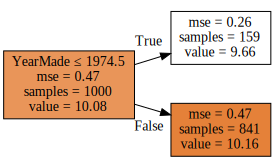

In [0]:
m = RandomForestRegressor(n_estimators =1 , max_depth=1,bootstrap=False)
m.fit(X_samp,y_samp)
draw_tree(m.estimators_[0],X_samp,precision=2)

In [0]:
def find_better_split(self,var_idx):
    x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
    
    for i in range(1,self.n-1):
        lhs = x<=x[i]
        rhs = x>x[i]
        if rhs.sum()==0: continue
        lhs_std = y[lhs].std()
        rhs_std = y[rhs].std()
        curr_score = lhs_std*lhs.sum()+rhs_std*rhs.sum()
        if curr_score < self.score:
            self.var_idx,self.score,self.split=var_idx,curr_score,x[i]

We need to define **find_better_split** and it takes a variable. Let's define our x (i.e independent variables) and say okay well it's everything inside our tree but only those indexes that are in this node which at the top of the tree is everything, and just this one variable (var_idx). Then for our y, it's just whatever our dependent variable is at the indexes in this node. So there are our x and y.  



```
x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
```


So let's now go through every single value in our independent variable. And I'll show you what's going to happen [35:22](https://youtu.be/O5F9vR2CNYI?t=35m22s). Let's say our independent variable is YearMade and it's going to be in an order. So we are going to go to every first row and we are going to say okay, YearMade here is 3. So what I'm going to do is I'm going to try and calculate the score if we decided to branch on the number 3. So I need to know which rows are greater than 3, which rows are less than or equal to 3 and they are going to become my left hand side and my right hand side. Then we need a score. There's lots of scores we could use so in random forests, we call this the **information gain**. The information gain  is like how much better does our score get because we split it into these two groups of data. There's lots of ways we could calculate it: Gini, cross-entropy, root mean squared error, etc. If you think about it, there is an alternative formulation of root mean squared error which is mathematically the same to within a constraint scale but a little bit easier to deal with which is we are going to try and find a split which causes the two groups to each have as lower standard deviation as possible. So I want to find a split that puts all the cats over here and all the dogs over there. So if these are all cats and those are all dogs, then this has standard deviation of zero and that has a standard deviation of zero. Or else this is a totally random mix of cats and dogs, and that is a totally random mix of cats and dogs, they are going to have much higher standard deviation. Does that make sense? So it turns out if you find a split that minimizes those group standard deviations or specifially the weighted average of the two standard deviations, it's mathematically the same as minimizing the root mean squared error. That's something you can prove to yourself after class if you want to. 

![alt text](https://cdn-images-1.medium.com/max/600/1*YPRlQvzCHdyTIGecgmas_w.png)

So we are going to need to find, first of all, split this into two groups [37:29](https://youtu.be/O5F9vR2CNYI?t=37m29s). So where's all the stuff that is greater than 3? 4,6 and 4. So we need standard deviation of their price.

![alt text](https://cdn-images-1.medium.com/max/600/1*Y-mKglrPzYBrQUB2i5isFw.png)

The next would be the standard deviation of less than or equal to 3 and we just take the weighted average of those two and that's our score. That would be our score if we split on 3.

![alt text](https://cdn-images-1.medium.com/max/600/1*kQT0MKQ942S3jem6CsCIzQ.png)


Then the next step would be try to split on 4 , try splitting on 1, try spliting on 6, redundantly try splitting on 4 again, then 1 again and find out which works the best. So that's our code here.


```
for i in range(1,self.n-1):
      lhs = x<=x[i]
      rhs = x>x[i]
      if rhs.sum()==0: continue
      lhs_std = y[lhs].std()
      rhs_std = y[rhs].std()
      curr_score = lhs_std*lhs.sum() + rhs_std*rhs.sum()
      if curr_score<self.score: 
        self.var_idx,self.score,self.split = var_idx,curr_score,x[i]
```


We are going to go through every row and let's say okay LHS is any values in x that are less than or equal to this particular value. Our RHS is every value in x that are greater than this particular value.

So what's the data type that's going to be in lhs or rhs? What are they actually going to contain? They are going to be arrays of booleans which we can treat as 0 and 1. So lhs will be an arrays of false everytime it's not less than or equal to; true otherwise, and rhs will be a boolean array of the opposite. Now we can't take a standard deviation of an empty set, so if there's nothing that's greater than this number (x[ i ]) then rhs will be all false which means the sum will be zero. In that case, let's not go any further with this step because there's nothing to take the standard deviation of and it's obviously not a useful split. 

So assuming we've got this far, we can now calculate the standard deviation of the lhs and of the rhs and take the weighted average or the sums are the same thing to a scaler and so there is our score. So we can then check is this better than our best score so far, and our best score so far, we intitially initialized it to infinity, so this is better. So if it's better, let's store away all of the information we need: which variable has found this better split, what was the score we found, and what was the value that we split on.



```
 if curr_score<self.score: 
        self.var_idx,self.score,self.split = var_idx,curr_score,x[i]
```

So there it is. If we run that and I'm using %timeit so what it does is it sees how long this command takes to run and it tries to give you a statistically valid measure of that so you can see here, it has run it 10 times to get an average and then it's done that 7 times to get a mean and standard deviation across runs, and so it's taking 77 milliseconds.




In [0]:
%timeit find_better_split(tree,1)
tree

10 loops, best of 3: 67 ms per loop


n:1000; val:10.079014121552744;score:681.0184057251435; split:3744.0; var:MachineHoursCurrentMeter

So let's check that this works [41:05](https://youtu.be/O5F9vR2CNYI?t=41m5s). find_better_split(tree,0) and 0 is YearMade, 1 is MachineHoursCurrentMeter with score: 681.018 and then we ran it again with 0 and we got a better score (658) and split 1974

In [0]:
find_better_split(tree,0)
tree

n:1000; val:10.079014121552744;score:658.5510186055949; split:1974.0; var:YearMade

So 1974, let's compare with scikit-learn's random forest above, and yes, that was what this tree did as well. So we've confirmed that this method is giving the same result that sklearn's random forest did. You can also see here the value 10.08 is matching the value in sklearn's root node's value. So we've got something that can handle one split.

![alt text](https://cdn-images-1.medium.com/max/800/1*G-2__lr_hao29yF5aWXrNw.png)

**Question**: Why don't we put a unique on the x [42:02](https://youtu.be/O5F9vR2CNYI?t=42m2s)? 
- Because I am not trying to optimize the performance the performance yet. You can see in the Excel I checked this 1 twice, 4 twice unnecessarily.

Okay, so Yannet is already thinking about performance which is good. So tell me what is the computational complexity of this section of the code?

![alt text](https://cdn-images-1.medium.com/max/800/1*hx1meIh7Yehl7fzjpGoBDw.png)

O($n^2$) because there is for loop and x <= x[ i ] which we have to check every value to see if it's less than x[ i ]. 

**It's useful to know how to quickly calculate computational complexity.** I can guarantee most of the interviews you do are going to ask you to calculate computational complexity on the fly. And also when you are coding, you want it to be second nature. The technique is basically " is there a loop?" if so we are obviously doing this n times so there is an n involved. Is there a loop inside the loop? ? If there is, then you need to multiply those two together. In this case, there is not. Is there anything inside the loop that's not a constant time operation? So you might see a sort in there and you just need to know that sort is **nlog(n)** -- that should be second nature. If you multiply it by the highest computational complexity inside the loop, n times n is $n^2$.

**Question**: In this case, couldn't we just presort the list and then do one **nlog(n)** computation [45:10](https://youtu.be/O5F9vR2CNYI?t=45m10s)? 
- There's lots of things we can do to speed this up, so at this stage is just what is the computational complexity we have. But absolutely. It's certainly not as good as it can be. So that's where we're going to go next. Just like alright, $n^2$ is not great so let's try and make it better. 

**So here is my attempt at making it better.** First of all, what is the equation for standard deviation?

![alt text](https://cdn-images-1.medium.com/max/800/1*uH0wJls9D7v-Jm1tHTTwaQ.png)

In practice, we don't normally use that formulation because it requires us calculating x minus the mean lot's of times.Does anybody know the formulation that just requires x and $x^2$ ? 

![alt text](https://cdn-images-1.medium.com/max/800/1*9N3jPiFcrsqEaEWsS40NXg.png)

That's a really good to know because you can now calculate variances or standard deviation of anything. You just have to first of all grab the columns as it is. Column squared. As long as you've got those stored away somewhere, you can immdiately calculate the standard deviation.

So the reason this is handy for us is that if we first of all sort our data [47:13](https://youtu.be/O5F9vR2CNYI?t=47m13s). 

Then if you think about it, as we start going down one step at a time, then each group is exactly the same as the previous group on the lhs with one more thing in it and on the rhs with one less thing in it. 

So given that just have to keep track of sum of x and sum of $x^2$, we can just add one more thing to x, one more thing to $x^2$ on the left and remove one thing on the right. So we don't have to go through the whole lot each time and so we can turn this into O(n) algorithm.



In [0]:
tree = TreeEnsemble(X_sub,y_train,1,1000).trees[0]

In [0]:
def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

def find_better_split_foo(self,var_idx):
    x,y= self.x.values[self.idxs,var_idx],self.y[self.idxs]
    
    sort_idx = np.argsort(x)
    sort_y, sort_x = y[sort_idx],x[sort_idx]
    rhs_cnt, rhs_sum, rhs_sum2 = self.n, sort_y.sum(),(sort_y**2).sum()
    lhs_cnt,lhs_sum,lhs_sum2=0,0.,0.
    
    for i in range(0,self.n-self.min_leaf):
        xi,yi = sort_x[i],sort_y[i]
        lhs_cnt += 1; rhs_cnt -= 1
        lhs_sum += yi; rhs_sum -= yi
        lhs_sum2 += yi**2; rhs_sum2 -= yi**2
        if i<self.min_leaf-1 or xi==sort_x[i+1]:
            continue
            
        lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
        rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
        curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
        if curr_score<self.score: 
            self.var_idx,self.score,self.split = var_idx,curr_score,xi

- I sort the data


```
sort_idx = np.argsort(x)
sort_y,sort_x = y[sort_idx], x[sort_idx]
```
- Then i'll keep track of the count of things on the right (rhs_cnt), the sum of things on the right (rhs_sum), and sum of squares on the right (rhs_sum2). Initially everything is on the rhs. So initially n is the count, y.sum() is the sum on the right, and $y^2$ (y**2) sum is the sum of squares on the right. Then nothing is initially on the left, so it's zeros.
```
rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
  lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.
```

Then we just have to loop through each observation:

- Add one the left hand count, subtract one from the right hand count.
```
lhs_cnt += 1; rhs_cnt -= 1
```
- Add the value to the left hand sum, subtract it from the right hand sum
```
lhs_sum += yi; rhs_sum -= yi
```
- Add the value squared to the left hand, subtract it from the right hand.
```
 lhs_sum2 += yi**2; rhs_sum2 -= yi**2
```
Now we do need to be careful through because if we are saying less than or equal to one, for example, we are not stopping at the first row but we have to have everything in that group.

![alt text](https://cdn-images-1.medium.com/max/800/1*JBdJ-U3DdtqYd1ggbL1zsQ.png)

So the other thing I'm going to do is **I'm going to make sure that the next value is not the same as this value**. If it is, I'm going to skip over it. So I'm just going to double check that this value and the next one aren't the same

```
if i<self.min_leaf or xi==sort_x[i+1]:
      continue
```
As long as they are the same, I can keep going to ahead and calculate my standard deviation now by passing in the count, the sum, and the sum squared. And there is that formula:

![alt text](https://cdn-images-1.medium.com/max/800/1*HrXewRakVlHsaRaiTaYZsA.png)

Do that for the right hand side and so now we can calculate the weighted average score just like before and all the lines below are the same. 

So we've turned O($n^2$) algorithm to O(n) algorithm. In general, stuff like this is going to get you alot more value than pushing something onto a Spark cluster or ordering faster RAM or using more cores in your CPU, etc. This is the way you want to be improving your code. Specifically, write your code without thinking too much about performance. Run it and see if it is fast enough for what you need. If so, then you're done. If not, profile it. In jupyter, you can say **%prun** and it will tell you exactly where the time was spent in your algorithm. 
Then you can go to that bit that's actually taking the time and think about if it is algorithmically as efficient as it can be. In this case, we run it and we've gone down from 77 milliseconds to less than 2 milliseconds. Now some people that are new to programming might think "oh great, I've saved 60 something milliseconds" but the point is this is going to get run tens of millions of times. So the 77 millisecond version is so slow that it's got to be impractical for any random forest you use in practice. Where else, the one millisecond version I found is actually quite acceptable.
 

In [0]:
%timeit find_better_split_foo(tree,1)
tree

1000 loops, best of 3: 1.69 ms per loop


n:1000; val:10.079014121552744;score:681.0184057251353; split:3744.0; var:MachineHoursCurrentMeter

And then check, the numbers should be exactly same as before and they are.

In [0]:
find_better_split_foo(tree,0); tree

n:1000; val:10.079014121552744;score:658.5510186055565; split:1974.0; var:YearMade

So now that we have a function, find_better_split, that does what we want, I want to insert it into my **DecisionTree** class [51:34](https://youtu.be/O5F9vR2CNYI?t=51m34s). And this is a really cool Python trick. Python does everything dynamically, so we can actually say the method called find_better_split in DecisionTree is that function I just created.

In [0]:
DecisionTree.find_better_split = find_better_split_foo

That sticks it inside that class. Now I'll tell you what's slightly confusing about this is that **find_better_split** on the left and **find_better_split** actually have no relationship to each other. They just happen to have the same letters in the same order. So I could call this **find_better_split_foo** and then I could call that. Now my function is actually called find_bettr_split_foo, but a method I'm expecting to call is something called DecisionTree.find_better_split. So here, I could say: 



```
DecisionTree.find_better_split = find_better_split_foo
```
It's important to understand how namespaces work in every languague that you use. One of the most important thing is understanding how it figures out what a name refers to. So this here (**DecisionTree.find_varsplit**) means **find_better_split** as defined inside DecisionTree class and nowhere else. This one on the right means **find_better_split_foo** in the global namespace. A lot of languages do not have a global namespace but Python does. So even if they happen to have same letters in the same other, they are not referring in any way to the same thing. It's like this family over here may have somebody called Jeremy, and my family has somebody called Jeremy. Our names happen to be the same but we are not the same person.

Now that we've stuck the **find_better_split** method inside the DecisionTree with this new definition, when I now call the **TreeEnsemble** constructor the decision tree ensemble constructor, it calls **create_tree**, and **create_tree** instantiates **DecisionTree**, **DecisionTree** calls **find_varsplit**, which goes through every column to see if it could find a better split and we've now defined **find_better_split**, and therefore **TreeEnsemble** when we create it has gone ahead and done this split [53:57](https://youtu.be/O5F9vR2CNYI?t=53m57s)




In [0]:
tree = TreeEnsemble(X_sub, y_train,1,1000).trees[0]; tree

n:1000; val:10.079014121552744;score:658.5510186055565; split:1974.0; var:YearMade

So this is pretty neat, right? We kind of just do a little bit at a time, testing everything as we go. As you all implement the random forest interpretation techniques, you may want to try programming this way to check every step what you are doing matches up with what scikit-learn does or with a test that you've build.


# Full single tree [55:13](https://youtu.be/O5F9vR2CNYI?t=55m13s)

At this point, we should try to go deeper for inception. Let's go now max_depth is 2. So here is what scikit-learn did. After breaking at YearMade 74, it then broke at MachineHoursCurrentMeter 2956.



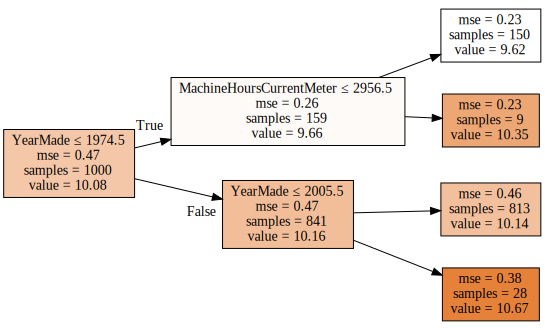

In [0]:
m = RandomForestRegressor(n_estimators = 1, max_depth=2,
                         bootstrap = False)
m.fit(X_samp,y_samp)
draw_tree(m.estimators_[0],X_samp,precision=2)

So we had this thing called **find_varsplit** which just went through every column and try to see if there is a better split there. But actually, we need to go a bit further than that. Not only do we have to go through every column and see if there is a better split in this node, but then we also have to see whether there is a better split in the left and the right sides that we just created. In other words, the lhs and the rhs should become decision tree themselves.

![alt text](https://cdn-images-1.medium.com/max/800/1*NaVW5LK70ktMvXZbqVQb-A.png)

There is no difference at all between what we do on the right to create this tree and what we do on the left to create this tree other than the one on the left contains 159 samples and the left one contains a thousand.

![alt text](https://cdn-images-1.medium.com/max/600/1*EEQTf9lZapNZTASOKnxrFg.png)

So the first line of code is exactly the same as we had before. Then we check if it is a leaf node. If it is a leaf node, then we have nothing further to do. So that means we are right at the bottom, there is no split that's been made, so we don't have to do anything further. On the other hand, if it's not a leaf node, then we need to split it into the left hand side and the right hand side. Now, earlier on, we created a lhs and rhs array of booleans. Better would be to have an array of indexes and that's because we don't want to have a full array of all the booleans in every single node. Because remember, although it doesn't look like there are many nodes when you see a tree of this size, when it's fully expanded, the bottom level (i.e if there is a minimum leaf size of 1) contains the same number of nodes as the entire dataset. So if everyone of those contained a full boolean array of size of the whole dataset, you've got squared memory requirements which would be bad. On the other hand, if we just store the indexes of everything in this node, then that is going to get smaller and smaller.

In [0]:
def find_varsplit(self):
    for i in range(self.c): self.find_better_split(i)
    if self.is_leaf: return
    x = self.split_col
    lhs = np.nonzero(x<=self.split)[0]
    rhs = np.nonzero(x>self.split) [0]
    self.lhs = DecisionTree(self.x,self.y,self.idxs[lhs])
    self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])

**np.nonzero** is exactly the same as **x <=self.split** which gets the boolean array but it turns into the indexes of the **true**'s [58:07](https://youtu.be/O5F9vR2CNYI?t=58m7s). So this lhs is now a list of indexes of the left hand side and the right hand side, so we can now just go ahead and create a decision tree. So **self.lhs** is our decision tree for the left, **self.rhs** is our decision tree for the right. And we don't have to do anything else. We've aldready written these. We already have a constructor that can create a decision tree. So when you really think about this is doing, it kind of hurt your head. Because the whole reason **find_varsplit**got called is because the decision tree constructor called it. But then **find_varsplit** itself then calls the decision tree constructor. So we actually have **circular recursion**. And I'm not really smart enough to be able to think through recursion, so I just choose not to. I just write what I mean and then I don't think about it anymore. What do I want? 
- To find a variable split. I got through every column, see if there's something better, 
```
    for i in range(self.c): self.find_better_split(i)
```
- if it manged to do a split 
```
    if self.is_leaf: return
    x = self.split_col
```
- figure out the lhs and the rhs and make them into decision trees. 
```
    lhs = np.nonzero(x<=self.split)[0]
    rhs = np.nonzero(x>self.split)[0]
    self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])
    self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])
```

Now try to think through how these two methods call each other would just drive me crazy but I don't need to. I know I have a decision tree contructor that works, I know I have a **find_varsplit** that works, so that's it. That's how I do recursive programming is by pretending I don't. I just ignore it. That's my advice. A lot of you are probably smart enough to be able to think through it better than I can, that's find if you can.


In [0]:
DecisionTree.find_varsplit = find_varsplit

So now that I've written that, again, I can patch it into the DecisionTree class as soon as I do, the TreeEnsemble constructor will now use that, because Python is dynamic.


In [0]:
tree = TreeEnsemble(X_sub,y_train,1,1000).trees[0]
tree

n:1000; val:10.079014121552744;score:658.5510186055565; split:1974.0; var:YearMade

Now I can check [1:00:31](https://youtu.be/O5F9vR2CNYI?t=1h31s). My lhs should have 159 samples and the value of 9.66



In [0]:
tree.lhs

n:159; val:9.660892662981706;score:76.82696888346362; split:2800.0; var:MachineHoursCurrentMeter

Rhs, 841 samples and 10.15

In [0]:
tree.rhs

n:841; val:10.158064432982941;score:571.4803525045031; split:2005.0; var:YearMade

Lhs of lhs , 150 samples and 9.62


In [0]:
tree.lhs.lhs

n:150; val:9.619280538108496;score:71.15906938383463; split:1000.0; var:YearMade

So you can see, becaue I'm not nearly clever enough to write machine learning algorithm, not only can I not write them correctly the first time, often every single line I write will be wrong. So i am always start from the assumption that the lind of code I just typed is almost certainly wrong. And I have to see why and how. So I just make sure. Eventually I get to the point where much to my surprise, it's not broken anymore. So here, I can feel like okay, it would be surprising if all of these things accidentally happen to be exactly the same as the scikit-learn. So this is looking pretty good.


In [0]:
tree.lhs.rhs


n:9; val:10.354428077535193

# Predictions[1:01:43](https://youtu.be/O5F9vR2CNYI?t=1h1m43s)

Now that we have somthing that can build a whole tree, we want to have something that calculate predictions. So to remind you, we already have something that calculate prediction for TreeEnsemble ( by calling **tree.predict(x)**), but there is nothing called **tree.predict** in **DecisionTree** so we are going to have to write that.

![alt text](https://cdn-images-1.medium.com/max/600/1*8W1cPYqRoYlJpnPu7ZekqA.png)

To make this more interesting, let's start bringing up the number of columns that we use


In [0]:
cols = ['MachineID', 'YearMade', 'MachineHoursCurrentMeter',
        'ProductSize', 'Enclosure','Coupler_System', 'saleYear']

Let's create our TreeEnsemble again.

In [0]:
%time tree = TreeEnsemble(X_train[cols],y_train,1,1000).trees[0]
X_samp,y_samp = tree.x,tree.y

CPU times: user 356 ms, sys: 2.98 ms, total: 359 ms
Wall time: 360 ms


And this time, let's go to a maximum depth of 3.

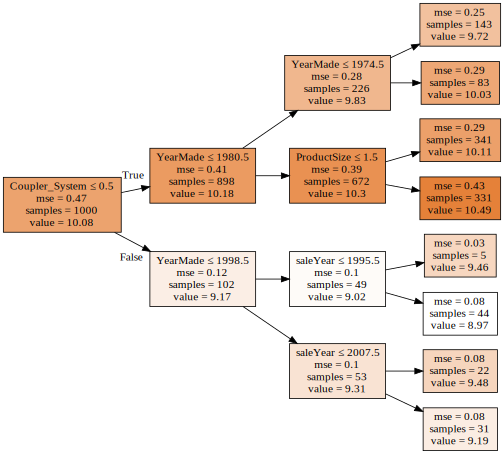

In [0]:
m = RandomForestRegressor(n_estimators=1, max_depth=3,bootstrap= False)
m.fit(X_samp,y_samp)
draw_tree(m.estimators_[0], X_samp,precision=2,ratio=0.9,size=7)

In [0]:
def predict(self,x): return np.array([self.predict_row(xi) for xi in x])
DecisionTree.predict = predict

So now our tree is getting more interesting. Let's now define how we create a set of prediction for a tree. So a set of predictions for a tree is simply the prediction for a row for every row. That's it. That's our predictions. So the predictions for a tree are every row's predictions in an array. So again, we're skipping thinking, thinking is hard. So let's just keep pushing it back. So this **for xi in x** is kind of handy, right? Notice that you can do **for** blah in array with a numpy array regardless of the rank of the array. **Regardless of the number of axes in the array. What it does is it will loop through the leading axis**.

**These concepts are going to be very very importants as we get into more and more neural networks because we are going to be all doing tensor computations all the time. So the leading axis of a vector is the vector itself. The leading axis of a matrix are the rows. The leading axis of a tree dimensional tensor is the matrices that represent the slices and so forth. In this case, because x is a matrix, this is going to loop through the rows**. And if you write a tensor code this way, then it will tend to generalize nicely to higher dimensions. It doesn't really matter how many dimensions there are in this x. This is going to loop through each of the leading axis. So we can now call that **DecisionTree.predict**




In [0]:
def predict_row(self,xi):
    if self.is_leaf: return self.val
    t = self.lhs if xi[self.var_idx] <= self.split else self.rhs
    return t.predict_row(xi)
DecisionTree.predict_row = predict_row

So all I need to do is write **predict_row** [1:04:17](https://youtu.be/O5F9vR2CNYI?t=1h4m17s). And I've delayed thinking so much, which is great, that the actual point where I actually have to do the work, it's now basically trivial. 
- If we are at a leaf node, then the prediction is just equal to whatever that value was which we calculated right back in the original tree constructor ( just the average of the y's). 
```
    if self.is_leaf: return self.val
```
- If it's not a leaf node, then we have to figure out whether to down the left hand path or the right hand path to get the prediction. So if this variable in this row(**xi[self.var_idx]**) is less than or equal to the amount we decided to split on, then we go down the left path; otherwise we go down the right path. 
```
    t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
```

- And then having figured out what path/tree we want, then we can just call predict_row on that. Again, we've accidently created something recursive. if it's a leaf, return the value; otherwise return the prediction for the left hand side or the right hand side as appropriate.
```
    return t.predict_row(xi)
```

Notice this here **self.lhs if xi[self.var_idx]<=self.split else self.rhs** , this if has nothing to do with this if:

```
if something:
    x =do1()
else:
    x =do2()
```

This if (right above) is a control flow statement that tells Python to go down on that path or that path to do some calculation. This if (below) is an operator that returns a values

```
x = do1() if something else do2()
```

So those of you that have done C or C++ will recognize it as being identical to this (i.e ternary operator):
```
x = something ? do1() : do2()

```

Basically what we are doing is we are going to get a value where we are going to say it's this value (do1()) if something is true and that value (do2()) otherwise. You could write it in the lengthy way but that would require writing 4 lines of code to do one thing, and also require you to code that if you read it to yourself or to somebody else, is not at all naturally the way you would express it. I want to say " the tree I'm going to go down is the left hand side if the variable is less than the split or the right hand side otherwise". So I want to write my code the way I would think about or the way I would say my code. So this kind of ternary operator can be quite helpful for that.

So now that I've got a prediction for a row, I can dump that into my class [1:07:09](https://youtu.be/O5F9vR2CNYI?t=1h7m9s)



In [0]:
DecisionTree.predict = predict

Now I can calculate the predictions

In [0]:
%time preds = tree.predict(X_valid[cols].values)

CPU times: user 98.2 ms, sys: 1 ms, total: 99.2 ms
Wall time: 101 ms


And I can now plot my actuals against my predictions [1:07:17] (https://youtu.be/O5F9vR2CNYI?t=1h7m17s). When you do a scatter plot, you'll often have a lot of dots sitting on top of each other, so a good trick is to use alpha. Alpha means how transparent the things, not just in matplotlib but in every graphics package in the world pretty much. So if you set alpha to less than 1, then this is saying you would need 20 dots on top of each other for it to be fully blue. So this is a good way to see how much things are sitting on top of each other- **a good trick for scatter plots**

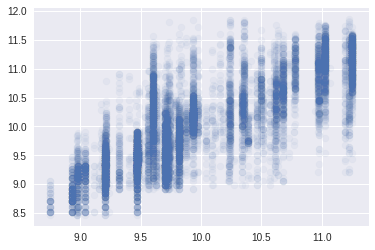

In [0]:
plt.scatter(preds,y_valid, alpha = 0.05)

There's my $R^2$

In [0]:
metrics.r2_score(preds,y_valid)

0.4840854669925271

So let's now go ahead and do a random forest with no max amount of splitting, and our tree ensemble had no max amount of splitting, we can compare our $R^2$ to their $R^2$.

CPU times: user 7.28 ms, sys: 986 µs, total: 8.26 ms
Wall time: 7.85 ms


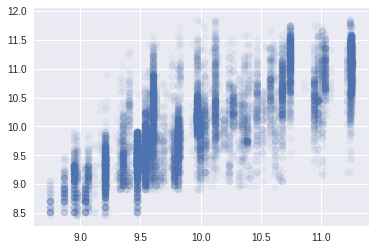

In [0]:
m = RandomForestRegressor(n_estimators=1, min_samples_leaf=5,
                         bootstrap= False)
%time m.fit(X_samp,y_samp)
preds = m.predict(X_valid[cols].values)
plt.scatter(preds,y_valid,alpha=0.05)

In [0]:
metrics.r2_score(preds,y_valid)

0.47541053100694797

They are not the same but actually ours is a little better. I don't know what we did differently, but we'll take it. So we have now something which for a forest with a single treein is giving as good accuracy on a validation set using an actual real-world dataset (blue book for bulldozers) compare to scikit-learn.

#Putting it together [1:08:50](https://youtu.be/O5F9vR2CNYI?t=1h8m50s)

Let's go ahead and round this out. So what I would want to do now is to create a package that has this code in. And I created it by creating a method here, a method there, and patching them together so what I did now is I went back through in my notebook and collected up all the cells that implemented methods and pasted them all together

In [0]:
class TreeEnsemble():
    def __init__(self, x, y, n_trees, sample_sz, min_leaf=5):
        np.random.seed(42)
        self.x,self.y,self.sample_sz,self.min_leaf = x,y,sample_sz,min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]

    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        return DecisionTree(self.x.iloc[idxs], self.y[idxs], 
                    idxs=np.array(range(self.sample_sz)), min_leaf=self.min_leaf)
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)

def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

In [0]:
class DecisionTree():
    def __init__(self, x, y, idxs, min_leaf=5):
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
        self.n,self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
        if self.score == float('inf'): return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])
        self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])

    def find_better_split(self, var_idx):
        x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf-1 or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]
    
    @property
    def is_leaf(self): return self.score == float('inf')
    
    def __repr__(self):
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

That was it. That was the code we wrote together

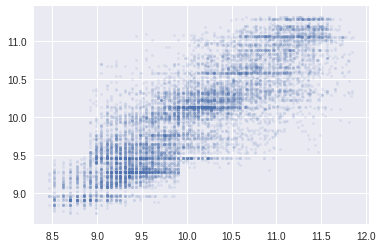

In [0]:
ens = TreeEnsemble(X_train[cols],y_train,5,1000)
preds = ens.predict(X_valid[cols].values)
plt.scatter(y_valid,preds,alpha=0.1,s=6);

In [0]:
metrics.r2_score(y_valid,preds)

0.7025757322910476

Here we are. We have a model of blue book for bulldozers with a 71 $R^2$ with a random forest we wrote entirely from scratch. That's pretty cool.

# Performance and Cython [1:12:30](https://youtu.be/O5F9vR2CNYI?t=1h12m30s)

When I tried comparing the performance of this against scikit-learn, this is quite a lot power and the reason why is that although a lot of the work is being done by numpy which is nicely optimized C code, think about the very bottom level of a tree. If we've got a million data points and bottom level of the tree has something like 500,000 decision points with a million leaves underneath. That's like 500,000 split methods being called, which contains multple calls to numpy which only have like one item that's being calculated on. That's very inefficient. It's kind of thing that Python is particularly not good at performance wise(i.e calling lots of functions lots of times). we can see it's not bad. For a random forest which 15 years ago would have been considered pretty big, this would be considered pretty good performance. But nowadays, this is some hundreds of times at least slower than it should be.

What scikit-learn folks did to avoid this problem was, they wrote their implementation in something called Cython. Cython is a superset of Python. So any Python you've written pretty much, you can use as Cython. But then what happens is Cython runs it in a very different way. Rather than passing it to the Python interpreter, it instead converts it to C, compiles that, and then runs that C code. Which means, the first time you run it, it takes a little longer since it has to go through the translation and compilation, but then after that it can be quite a bit faster. So I wanted just to quickly show you what that looks like because you are absolutely going to be in a position where Cython is going to help you with your work and most of the people you are working with, they will have never used it( maynot even know it exists), so this is like a greate superpower to have.

To use Cython in a notebook, you say:

In [0]:
%load_ext Cython

Here is a Python function fib1:

In [0]:
def fib1(n):
    a,b = 0,1
    while b<n:
        a,b = b , a+b
        
    

Here is the same as a Cython function. It's exactly the same thing with %%cython at the top. This actually runs about twice as fast as fib1 just because it does the compilation

In [0]:
%%cython
def fib2(n):
    a,b = 0,1
    while b<n:
        a,b = b,a+b
        

Here is the same version again where I've used a special Cython extension called **cdef** which defines the C data type of the return value and of each variable. Basically that's the trick that you can use to start making things run quickly. And that point, now it knows it's not just some Python object called T. So fib3, it's exactly the same as before but we say what the data type of the thing we passed to it was is and then define the data types of each variables.



In [0]:
%%cython
def fib3(int n):
    cdef int b = 1
    cdef int a = 0
    cdef int t = 0
    while b<n:
        t = a
        a = b
        b = a + b
        
    

Ok then if we call that, we've now got something that's 10 times faster.

In [0]:
%timeit fib1(50)

1000000 loops, best of 3: 987 ns per loop


In [0]:
%timeit fib2(50)

The slowest run took 11.60 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 298 ns per loop


In [0]:
%timeit fib3(50)

The slowest run took 38.02 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 73.6 ns per loop


It doesn't really take much extra and it's just Python with a few little bits of markup, so it's good to know that it exists because if there's something custom you're trying to do, it's actually painful having to go out and goint to C and compile it and link it back and all that. Where else doing it here is pretty easy.

**Question**: When you are doing the Cython version, in for numpy array, is there a specific C type of it [1:17:16](https://youtu.be/O5F9vR2CNYI?t=1h17m16s)? Yes, there are a lot specific stuff for integrating Cython with numpy and there's a whole page about it. So we don't worry about going over it but you can read that and you can basically see the basic ideas.

[Working with numpy - Cython](https://cython.readthedocs.io/en/latest/src/tutorial/numpy.html)

There is this cimport which basically imports a certain types of Python library into the kind of the C bit of the code and you can then use it in your Cython. It's pretty straight forward.

So now your mission now is to implement:
- Confidence based on tree variance
- feature importance
- Partial dependence
- Then tree interpreter, 

For that random forest, removing redundant features doesn't use a random forest at all, so you don't have to worry about that. So it's just the other ones. So confidence based on tree variance, we've already written that code so I suspect that the exact same code we have in the notebook should continue to work. So you can try and make sure to get that working. 

Feature importance is with the variable shuffling technique and once you have that working, partial dependence will just be a couple of lines of code away because rather shuffling a column, you're just replacing it with a constant value. It's nearly the same code.

Then tree interpreter, it's going to require you writing some code  and thinking about that. Once you've written tree interpreter, you're very close, if you want to , to creating the second approach to feature importance -- the one where you add up the importance across all the rows. Which means, you would then be very close to doing interaction importance. So it turns out that there's actually a very good library for interaction importance for xgboost but there doesn't seem to be one for random forest, so you could start by getting it working on our version ( if you want to do interaction importance) and then you would get it working on the orginal scikit-learn version that would be a cool contribution. Sometimes writing it against your own implementation is nicer because you can see exactly what's going on.

If you get stuck at any point, ask on the forum. There is a whole page on wiki about [how to ask for help](http://wiki.fast.ai/index.php/How_to_ask_for_Help). When you ask your co-workers on Slack for help, when you ask people in a technical community on Github or Discourse for help, asking for help the right way will go a long way towards having people want to help you

- Search for the error you are getting, see if somebody’s already asked about it.
- How have you tried to fix it already?
- What do you think is going wrong?
- What kind of computer are you on? How is it setup? What are the software versions?
- Exactly what did you type and exactly what happened?
You could do that by taking a screenshot, so make sure you’ve got some screenshot software that’s really easy to use. So if I were to take a screenshot, I just hit a button, select the area, copy to clipboard, go to forum, paste it in, and there we go (You can even make the image smaller!).


![alt text](https://cdn-images-1.medium.com/max/1600/1*7eT-1tMwyzQ0YAAgO1Nfqw.png)

Better still, if there are a few lines of code and error messages to look at, create a Gist. Gist is a handy little Github thing which basically lets you share code. If I wanted to create a Gist of this, I actually have an extension:


![alt text](https://cdn-images-1.medium.com/max/1600/1*gsw3QjSgHiTsxPtwRjTBZw.png)


So click on that, give it a name, and say make public. That takes my Jupyter Notebook and shares it publicly. I can then grab that URL, copy link location, and paste it into my forum post. Then when people click on it, then they’ll immediately see my notebook.

Now that particular button is an extension, so on Jupyter, you need to click on Nbextensions and click on Gist-it. While you are there, you should also click on Collapsible Headings that’s this handy thing I use that lets me collapse things and open them up.

![alt text](https://cdn-images-1.medium.com/max/1600/1*RR4mqOcaiG1ctOiNL8OHVg.png)

If you go to your Jupyter and don’t see this Nbextensions button, then just google for Jupyter Nbextensions — it’ll show you how to pip install it and get it set up.